# Importing libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# The data 
Let's start by reading the file into the pandas dataframe.

In [28]:
train=pd.read_csv('C:/Users/PRIYA/Desktop/Examples for R algo/Logistic regression/Titanic dataset/full.csv')

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


# Let's start with the exploratory data analysis(EDA).
The first and the important or the mandatory step for doing eda is to find missing value.
Here we can use seaborn to create a simple heatmap to see where we are missing the data.

In [30]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1305,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1306,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1307,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [31]:
train.shape

(1309, 21)

In [32]:
train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

# This will give me the count of the missing values.

# As we cannot look data points one by one,so we use heatmap.

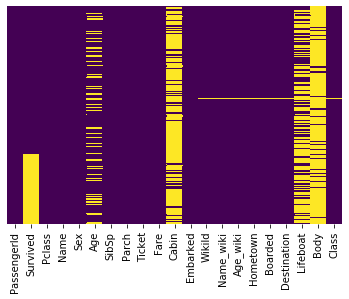

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

cbar is used to show the range to the right side,and cmap is used to give new colors to the output.

Here,we see we have missing values in features like survived,age,cabin,lifeboat,body.
we also see,survived has roughly 30 %to 35% missing values,age roughly to 20% to 25%,cabin,lifeboat,body are missing too much of the data,so probably we can drop the features,or we can change the feature with categorical data or with something else.

# We can replace the values with the similar feature or we can replace it with the mean value of the feature which we need to replace.
For that we can use box plot and fill the na values with the mean value as shown below.

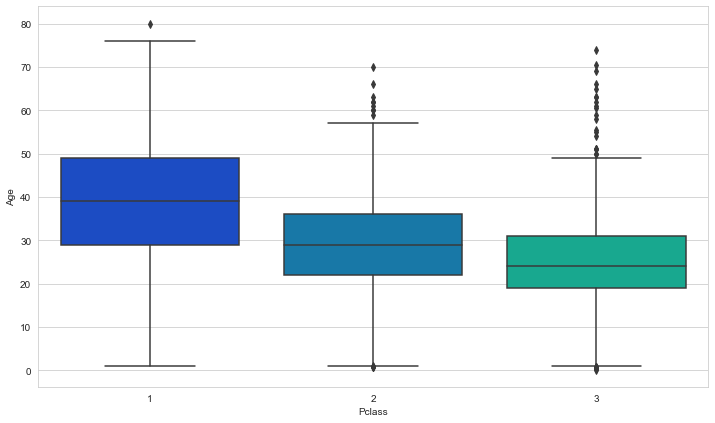

In [56]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Based on the average value by the boxplot we can replace the NaN value.

with the help of the simple function we can refill the NaN value.

def impute_age(cols)"
 Age=cols([0]
 Pclass=cols[1]
 
   if pd.isnull(Age):
     
     if Pclass ==1:
        return 37
      
     elif Pclass ==2:
        return 28

     else:
        return 24
   
   else:
       return Age
       
       
       
Now i have created the function,now how to apply it.
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)


underline doesn't mean anything we do not need to draw.

# But for time being we will go with the refilling method,that is shown below.

In [57]:
train.Age.loc[train.Age.isna()] = train.Age_wiki

C:\Users\PRIYA\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


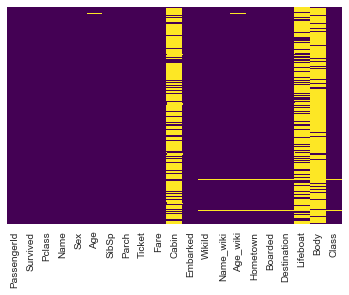

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we see 'age' feature has eliminated it's missing values by comparing the feature'age' and the 'age_wiki' and replacing it with the value of 'age_wiki' to the age.

# As we see the target feature has missing values which will create problem for the model.we need to get rid of this missing.

As we see,as we are looking for the survival on titanic ship,if it is missing we can say he will not survive.
so we can refill it with '0'

In [59]:
train['Survived']=train['Survived'].fillna(0)

In [60]:
train.shape

(1309, 21)

In [61]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               4
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

As i can see,imputation is done,refilling the values to zero for the Traget variable.

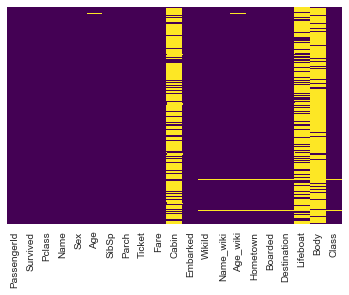

In [62]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Now ,i want to know the count of how many survived,and how many couldn't make it.(i.e; 1 for survived and 0 for not survived.

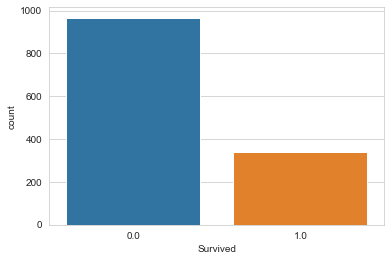

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

As we see around 940 person didn't survived,also roughly 320 did survive.  

# Now,in the survival count let's see how many were men and how many were women.

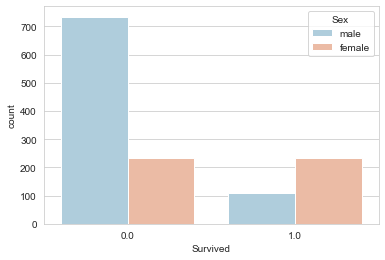

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

We see around 110 are male and around 220 are female,in the survival feature.

# Also,i want to see what was the class of the passenger in the survival feature.

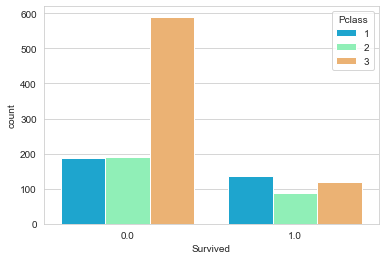

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

We see,around 135 people were of 1 class,around 90 were from 2 class and around 115 were from third class.

# Now let's see the average distribution of the age.
we will use distplot to find the average.

We see after refilling the age feature with the wiki age,we still have missing value so we can drop that missing value.

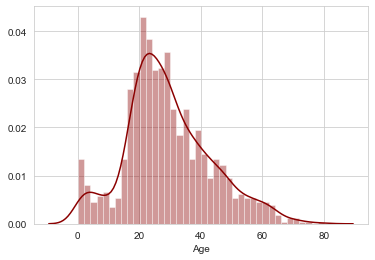

In [66]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=40)

kde(kernel density estimation) means the line appearing on the graph.
We have inference like most of the age fall between 18 to 32 roughly.

# Now,i need to know whether the people has sibling or spouse . 

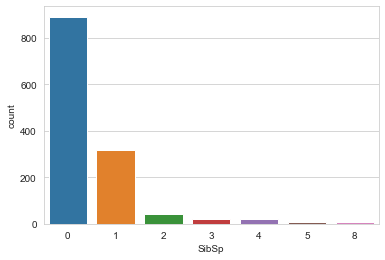

In [67]:
sns.countplot(x='SibSp',data=train)

from this plot we can infer that around 720 didn't have any spouse or sibling,also 300 did have 1 spouse or sibling ,around 30 people have 2 sibling/spouse,and so on.

# Now i need to see the fare of the ticket.

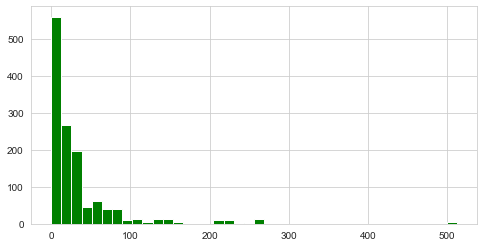

In [68]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

Now most of the part is done for EDA as a basic part,if we want to replace the NaN value with something we need to do a lot of feature engineering,but for time being we can drop that feature.

# Droping of the features.

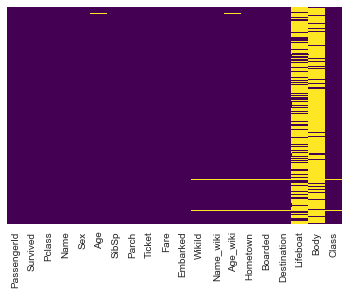

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
train.drop('Lifeboat',axis=1,inplace=True)

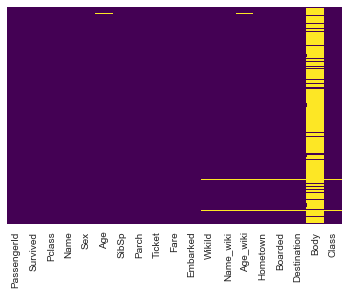

In [77]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
train.drop('Body',axis=1,inplace=True)

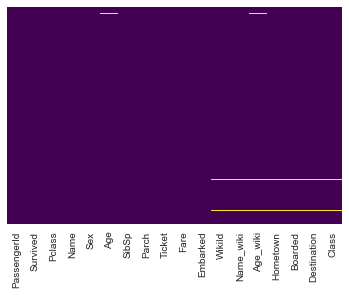

In [79]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see there ar still missing values again we need to fill that gap.